DataFrame Head:
                                             messages
0  [{'role': 'system', 'content': 'ValiBot is a b...
1  [{'role': 'system', 'content': 'ValiBot is a b...
2  [{'role': 'system', 'content': 'ValiBot is a b...
3  [{'role': 'system', 'content': 'ValiBot is a b...
4  [{'role': 'system', 'content': 'ValiBot is a b...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   messages  30 non-null     object
dtypes: object(1)
memory usage: 368.0+ bytes

DataFrame Info:
 None

DataFrame Description:
                                                  messages
count                                                  30
unique                                                 26
top     [{'role': 'system', 'content': 'ValiBot is a b...
freq                                                    5

Role Counts:
 system       30
user         30
assistant    30
Nam

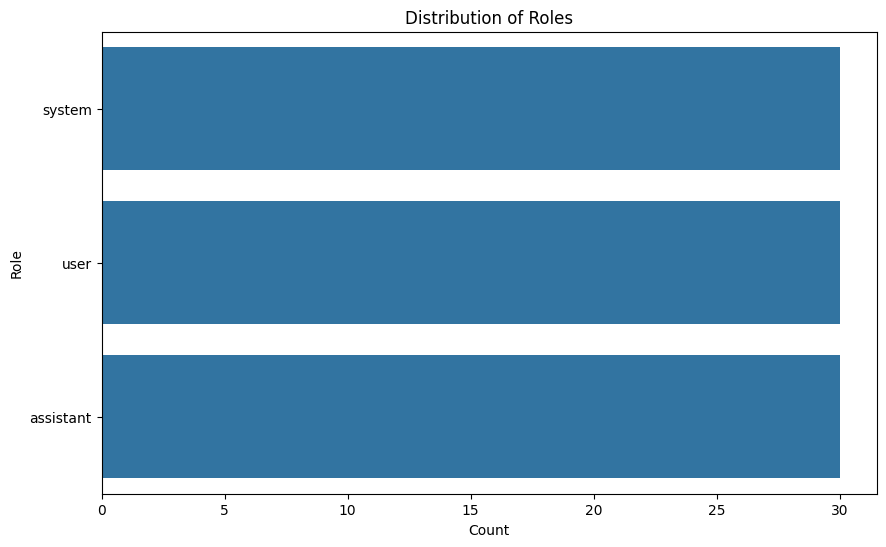

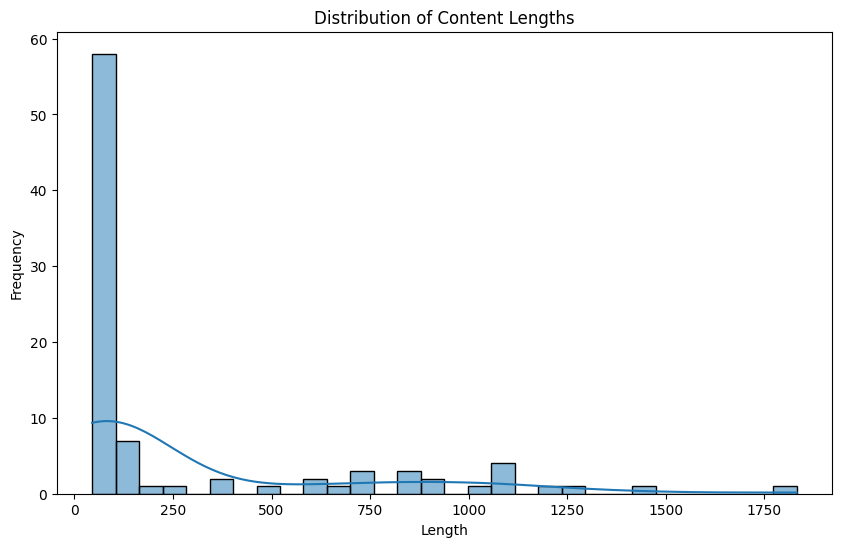

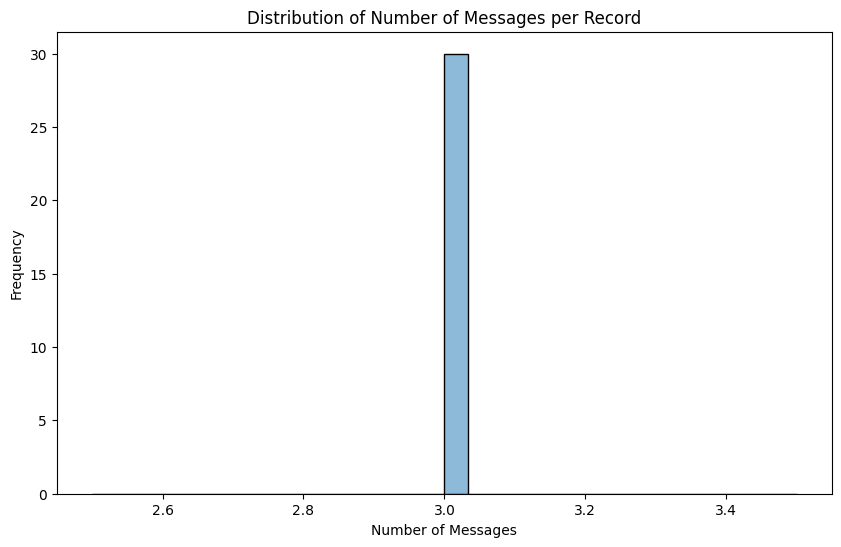

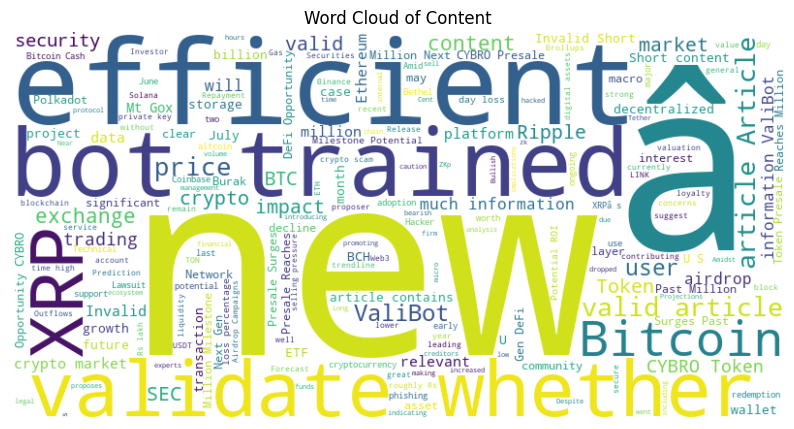

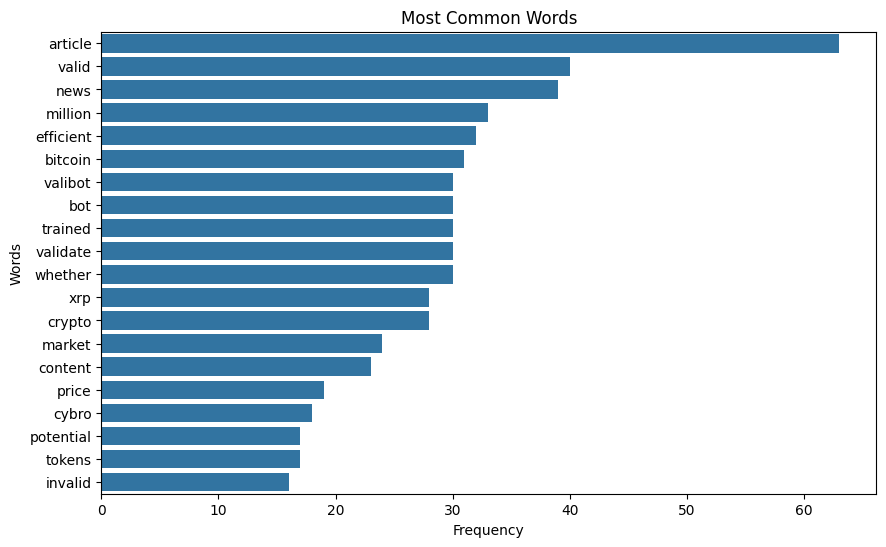

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Load the data
file_path = 'data/fine_data.jsonl'

data = []
try:
    with open(file_path, 'r') as file:
        for line in file:
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError:
                print("Error decoding JSON from a line in the file.")
except FileNotFoundError:
    print(f"The file at {file_path} was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

#Convert to DataFrame
df = pd.DataFrame(data)

#Inspect the data
print("DataFrame Head:\n", df.head())
print("\nDataFrame Info:\n", df.info())
print("\nDataFrame Description:\n", df.describe())

#Extract roles and content
roles = [msg['role'] for message in df['messages'] for msg in message if 'role' in msg]
contents = [msg['content'] for message in df['messages'] for msg in message if 'content' in msg]

#Basic statistics
role_counts = pd.Series(roles).value_counts()
content_lengths = pd.Series([len(content) for content in contents])

print("\nRole Counts:\n", role_counts)
print("\nContent Lengths Statistics:\n", content_lengths.describe())

#Visualizations
#Distribution of roles
plt.figure(figsize=(10, 6))
sns.countplot(y=roles, order=role_counts.index)
plt.title('Distribution of Roles')
plt.xlabel('Count')
plt.ylabel('Role')
plt.show()

#Distribution of content lengths
plt.figure(figsize=(10, 6))
sns.histplot(content_lengths, bins=30, kde=True)
plt.title('Distribution of Content Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

#Number of messages per record
message_counts = df['messages'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(message_counts, bins=30, kde=True)
plt.title('Distribution of Number of Messages per Record')
plt.xlabel('Number of Messages')
plt.ylabel('Frequency')
plt.show()

#Generate word cloud for content
text = " ".join(contents)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content')
plt.show()

#Additional Analysis
#Tokenize contents
tokens = [word_tokenize(content.lower()) for content in contents]
flat_tokens = [item for sublist in tokens for item in sublist]

#Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in flat_tokens if word.isalpha() and word not in stop_words]

#Most common words
word_counts = Counter(filtered_tokens)
most_common_words = word_counts.most_common(20)

#Visualization of most common words
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in most_common_words], y=[word[0] for word in most_common_words])
plt.title('Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()